<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-VazquezTadeoAndrea/blob/main/Actividad6_Visualizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

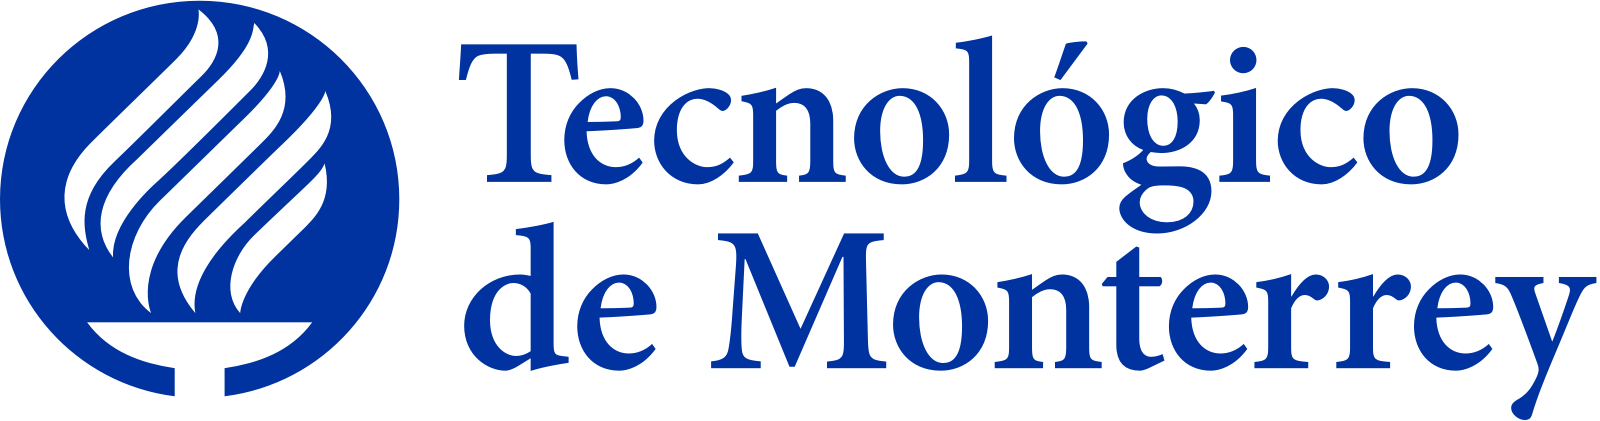

Actividad: Visualización

Nombre: Andrea Vazquez Tadeo

Matricula: A01730613

Materia: Ciencia y analitica de datos

Profesor: Maria de la Paz Rico Fernandez

Fecha: 01 de noviembre de 2022

#1. Cargamos el Dataset

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [92]:
input = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"

##Descripción del Dataset

Esta investigación empleó una variable binaria, pago por defecto (Sí = 1, No = 0), como variable de respuesta. Este estudio revisó la literatura y utilizó las siguientes 23 variables como variables explicativas:

X1: Monto del crédito otorgado (dólar NT): incluye tanto el crédito de consumo individual como su crédito familiar (complementario).

X2: Género (1 = masculino; 2 = femenino).

X3: Educación (1 = posgrado; 2 = universidad; 3 = secundaria; 4 = otros)

X4: Estado civil (1 = casado; 2 = soltero; 3 = otros).

X5: Edad (año).

X6 - X11: Historial de pagos pasados. Hicimos un seguimiento de los registros de pagos mensuales pasados ​​(de abril a septiembre de 2005) de la siguiente manera:

X6 = el estado de pago en septiembre de 2005;
X7 = el estado de pago en agosto de 2005;
X11 = estado de amortización en abril de 2005. La escala de medición del estado de amortización es: -1 = pagar debidamente; 1 = retraso en el pago de un mes; 2 = retraso en el pago de dos meses; . . .; 8 = retraso en el pago de ocho meses; 9 = retraso en el pago de nueve meses o más.
X12-X17: Importe del estado de cuenta (dólar NT).

X12 = monto del estado de cuenta en septiembre de 2005;
X13 = monto del estado de cuenta en agosto de 2005;
X17 = monto del estado de cuenta en abril de 2005.
X18-X23: Monto del pago anterior (dólar NT).

X18 = monto pagado en septiembre de 2005;
X19 = monto pagado en agosto de 2005;
X23 = monto pagado en abril de 2005.

#2. Obtenemos información del Dataframe a través de metodos

In [93]:
#Visualizamos la base de datos
DFPCA = pd.read_csv(input, index_col=0)
DFPCA.index.name = None
DFPCA

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [94]:
DFPCA.shape

(30000, 24)

In [95]:
DFPCA.describe

<bound method NDFrame.describe of            X1   X2   X3   X4    X5   X6   X7   X8   X9  X10  ...      X15  \
1       20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0 -2.0  ...      0.0   
2      120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  0.0  ...   3272.0   
3       90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  0.0  ...  14331.0   
4       50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  0.0  ...  28314.0   
5       50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  0.0  ...  20940.0   
...       ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...      ...   
29996  220000  1.0  3.0  1.0  39.0  0.0  0.0  0.0  0.0  0.0  ...  88004.0   
29997  150000  1.0  3.0  2.0  43.0 -1.0 -1.0 -1.0 -1.0  0.0  ...   8979.0   
29998   30000  1.0  2.0  2.0  37.0  4.0  3.0  2.0 -1.0  0.0  ...  20878.0   
29999   80000  1.0  3.0  1.0  41.0  1.0 -1.0  0.0  0.0  0.0  ...  52774.0   
30000   50000  1.0  2.0  1.0  46.0  0.0  0.0  0.0  0.0  0.0  ...  36535.0   

           X16      X17      X18      X19

Visualizamos que el contendio de nuestro dataset es de de 30000 filas en 25 columnas.


##Renombramos las columnas del Dataframe 

In [96]:
DFPCA.rename(columns = {"X1": "Monto", "X2": "Genero", "X3": "Educacion", "X4" : "EstadoCivil", "X5" : "Edad",
                     "X6": "PAGSEP", "X7": "PAGAGO", "X8":"PAGJUL", "X9": "PAGJUN", "X10":"PAGMAY", "X11": "AMORT_ABR", "X12": "ECSEP", "X13": "ECAGO", "X14": "ECJUL", "X15":"ECJUN",
                     "X16": "ECMAY", "X17":"ECABR", "X18":"MTOSEP", "X19":"MTOAGO", "X20":"MTOJUL", "X21":"MTOJUN", "X22":"MTOMAY", "X23":"MTOABR", "Y":"Output"}, inplace = True)
DFPCA.head()

,Monto,Genero,Educacion,EstadoCivil,Edad,PAGSEP,PAGAGO,PAGJUL,PAGJUN,PAGMAY,...,ECJUN,ECMAY,ECABR,MTOSEP,MTOAGO,MTOJUL,MTOJUN,MTOMAY,MTOABR,Output
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [97]:
print("Columnas", DFPCA.columns)

Columnas Index(['Monto', 'Genero', 'Educacion', 'EstadoCivil', 'Edad', 'PAGSEP',
       'PAGAGO', 'PAGJUL', 'PAGJUN', 'PAGMAY', 'AMORT_ABR', 'ECSEP', 'ECAGO',
       'ECJUL', 'ECJUN', 'ECMAY', 'ECABR', 'MTOSEP', 'MTOAGO', 'MTOJUL',
       'MTOJUN', 'MTOMAY', 'MTOABR', 'Output'],
      dtype='object')


In [98]:
print("Tipos", DFPCA.dtypes)

Tipos Monto            int64
Genero         float64
Educacion      float64
EstadoCivil    float64
Edad           float64
PAGSEP         float64
PAGAGO         float64
PAGJUL         float64
PAGJUN         float64
PAGMAY         float64
AMORT_ABR      float64
ECSEP          float64
ECAGO          float64
ECJUL          float64
ECJUN          float64
ECMAY          float64
ECABR          float64
MTOSEP         float64
MTOAGO         float64
MTOJUL         float64
MTOJUN         float64
MTOMAY         float64
MTOABR         float64
Output         float64
dtype: object


In [99]:
DFPCA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Monto        30000 non-null  int64  
 1   Genero       29999 non-null  float64
 2   Educacion    29998 non-null  float64
 3   EstadoCivil  29998 non-null  float64
 4   Edad         29995 non-null  float64
 5   PAGSEP       29997 non-null  float64
 6   PAGAGO       29995 non-null  float64
 7   PAGJUL       29993 non-null  float64
 8   PAGJUN       29991 non-null  float64
 9   PAGMAY       29984 non-null  float64
 10  AMORT_ABR    29986 non-null  float64
 11  ECSEP        29989 non-null  float64
 12  ECAGO        29989 non-null  float64
 13  ECJUL        29987 non-null  float64
 14  ECJUN        29985 non-null  float64
 15  ECMAY        29983 non-null  float64
 16  ECABR        29990 non-null  float64
 17  MTOSEP       29992 non-null  float64
 18  MTOAGO       29991 non-null  float64
 19  MTOJ

In [100]:
DFPCA.isna().sum().sort_values(ascending=False)

ECMAY          17
PAGMAY         16
ECJUN          15
AMORT_ABR      14
ECJUL          13
ECSEP          11
ECAGO          11
MTOJUN         11
MTOMAY         11
ECABR          10
PAGJUN          9
MTOAGO          9
MTOJUL          8
MTOSEP          8
PAGJUL          7
PAGAGO          5
Edad            5
MTOABR          5
Output          3
PAGSEP          3
EstadoCivil     2
Educacion       2
Genero          1
Monto           0
dtype: int64

In [101]:
DFPCA.head(8)

,Monto,Genero,Educacion,EstadoCivil,Edad,PAGSEP,PAGAGO,PAGJUL,PAGJUN,PAGMAY,...,ECJUN,ECMAY,ECABR,MTOSEP,MTOAGO,MTOJUL,MTOJUN,MTOMAY,MTOABR,Output
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
6,50000,1.0,1.0,2.0,37.0,0.0,0.0,0.0,0.0,0.0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0.0
7,500000,1.0,1.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0.0
8,100000,2.0,2.0,2.0,23.0,0.0,-1.0,-1.0,0.0,0.0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0.0


In [102]:
DFPCA.shape

(30000, 24)

#3. Limpiamos datos

In [103]:
X = DFPCA.iloc[0:, 0:25]
y = DFPCA.iloc[:, -1]

In [104]:
X.shape

(30000, 24)

In [105]:
y.shape

(30000,)

In [106]:
#Limpiamos los datos eliminando los registros nulos
DFPCA.isnull().sum()

Monto           0
Genero          1
Educacion       2
EstadoCivil     2
Edad            5
PAGSEP          3
PAGAGO          5
PAGJUL          7
PAGJUN          9
PAGMAY         16
AMORT_ABR      14
ECSEP          11
ECAGO          11
ECJUL          13
ECJUN          15
ECMAY          17
ECABR          10
MTOSEP          8
MTOAGO          9
MTOJUL          8
MTOJUN         11
MTOMAY         11
MTOABR          5
Output          3
dtype: int64

In [107]:
#Reemplazamos campos vacíos por 0 y dejamos 10 filas como test 
DFPCA.dropna(axis = 0, inplace=True)
DFPCA.head()

,Monto,Genero,Educacion,EstadoCivil,Edad,PAGSEP,PAGAGO,PAGJUL,PAGJUN,PAGMAY,...,ECJUN,ECMAY,ECABR,MTOSEP,MTOAGO,MTOJUL,MTOJUN,MTOMAY,MTOABR,Output
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [108]:
#Comprobamos que no existan valores nulos en el Dataframe
DFPCA.isna().any()

Monto          False
Genero         False
Educacion      False
EstadoCivil    False
Edad           False
PAGSEP         False
PAGAGO         False
PAGJUL         False
PAGJUN         False
PAGMAY         False
AMORT_ABR      False
ECSEP          False
ECAGO          False
ECJUL          False
ECJUN          False
ECMAY          False
ECABR          False
MTOSEP         False
MTOAGO         False
MTOJUL         False
MTOJUN         False
MTOMAY         False
MTOABR         False
Output         False
dtype: bool

#4. Estadistica descriptiva

In [109]:
DFPCA.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Monto,29958.0,167555.900928,129737.299088,10000.0,50000.00,140000.0,240000.00,1000000.0
Genero,29958.0,1.604012,0.489070,1.0,1.00,2.0,2.00,2.0
Educacion,29958.0,1.853094,0.790471,0.0,1.00,2.0,2.00,6.0
EstadoCivil,29958.0,1.551739,0.521952,0.0,1.00,2.0,2.00,3.0
Edad,29958.0,35.483443,9.214319,21.0,28.00,34.0,41.00,79.0
PAGSEP,29958.0,-0.017124,1.123989,-2.0,-1.00,0.0,0.00,8.0
PAGAGO,29958.0,-0.134021,1.197171,-2.0,-1.00,0.0,0.00,8.0
PAGJUL,29958.0,-0.166767,1.196026,-2.0,-1.00,0.0,0.00,8.0
PAGJUN,29958.0,-0.221110,1.168419,-2.0,-1.00,0.0,0.00,8.0
PAGMAY,29958.0,-0.266807,1.132307,-2.0,-1.00,0.0,0.00,8.0


En la tabla se puede apreciar la tendenecia central, la cual está determinada por la media o mean, por su nombre en inglés. Esta variable, que también se conoce como promedio, muestra cuáles son los valores medios de cada columna. Por otro lado, la dispersión está determinada por la desviación estándar, que aparece con las siglas std. Dicha desviación nos dice qué tanto se podría mover el intervalo de los datos respecto a la media. Por lo tanto, a mayor desviación estándar, quiere decir que los datos se encuentran con mayor dispersión. Mientras que si ésta es pequeña, nos indica que el intervalo de los datos se encuentra cercano a la media. Igualmente, los perdentiles de 25%, 50% y 75% nos indican si la dispersión está sesgada hacia la derecha o hacia la izquierda. Ya que si en el primer cuartil (25%) se encuentra un bajo nivel de datos, quiere decir que la dispersión de datos tiene mayor concentración hacia la izquierda de la curva normal. En este sentido, el 50% y 75% tendrían la mayor cantidad de datos.



#5. Variables categoricas 

In [110]:
#Realizamos backup del DataFrame
DFPCA2 = DFPCA.copy()

In [111]:
ConteoCat = DFPCA2.drop(["Monto", "ECSEP", "ECAGO", "ECJUL", "ECJUN", "ECMAY", "ECABR", "MTOSEP", "MTOAGO", "MTOJUL", "MTOJUN", "MTOMAY", "MTOABR"], axis = 1)
ConteoCat

,Genero,Educacion,EstadoCivil,Edad,PAGSEP,PAGAGO,PAGJUL,PAGJUN,PAGMAY,AMORT_ABR,Output
1,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,1.0
2,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,1.0
3,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
29996,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29997,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0
29998,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,0.0,1.0
29999,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,-1.0,1.0


In [112]:
ConteoCat = list(DFPCA.iloc[:,1:11])
ConteoCat.remove('Edad')

In [113]:
print('Las variables categóricas son: ', ConteoCat)

Las variables categóricas son:  ['Genero', 'Educacion', 'EstadoCivil', 'PAGSEP', 'PAGAGO', 'PAGJUL', 'PAGJUN', 'PAGMAY', 'AMORT_ABR']


Para poder aplicar la tecnica de PCA tenemos que trabajar con variables numericas

In [114]:
ConteoNum = DFPCA2.drop(["Genero", "Educacion", "EstadoCivil", "PAGSEP", "PAGAGO", "PAGJUL", "PAGJUN", "PAGMAY", "AMORT_ABR", "Output"], axis = 1)
ConteoNum
ConteoNum.head(6)

,Monto,Edad,ECSEP,ECAGO,ECJUL,ECJUN,ECMAY,ECABR,MTOSEP,MTOAGO,MTOJUL,MTOJUN,MTOMAY,MTOABR
1,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
6,50000,37.0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0


In [115]:
ConteoNum.corr()

,Monto,Edad,ECSEP,ECAGO,ECJUL,ECJUN,ECMAY,ECABR,MTOSEP,MTOAGO,MTOJUL,MTOJUN,MTOMAY,MTOABR
Monto,1.000000,0.144515,0.285616,0.278435,0.283373,0.294090,0.295625,0.290517,0.195026,0.178320,0.210052,0.203187,0.216990,0.219567
Edad,0.144515,1.000000,0.056357,0.054469,0.053911,0.051528,0.049515,0.047810,0.025995,0.021820,0.029262,0.021338,0.022811,0.019533
ECSEP,0.285616,0.056357,1.000000,0.951494,0.892272,0.860273,0.829781,0.802638,0.140276,0.099301,0.156856,0.158260,0.167010,0.179287
ECAGO,0.278435,0.054469,0.951494,1.000000,0.928306,0.892456,0.859756,0.831570,0.280323,0.100770,0.150631,0.147338,0.157848,0.174180
ECJUL,0.283373,0.053911,0.892272,0.928306,1.000000,0.923953,0.883893,0.853302,0.244291,0.316904,0.129933,0.143343,0.179617,0.182257
ECJUN,0.294090,0.051528,0.860273,0.892456,0.923953,1.000000,0.940133,0.900931,0.232916,0.207498,0.299953,0.130124,0.160283,0.177562
ECMAY,0.295625,0.049515,0.829781,0.859756,0.883893,0.940133,1.000000,0.946187,0.216967,0.181177,0.252229,0.293084,0.141421,0.164102
ECABR,0.290517,0.047810,0.802638,0.831570,0.853302,0.900931,0.946187,1.000000,0.199966,0.172615,0.233710,0.250218,0.307691,0.115415
MTOSEP,0.195026,0.025995,0.140276,0.280323,0.244291,0.232916,0.216967,0.199966,1.000000,0.285522,0.252063,0.199491,0.148102,0.185659
MTOAGO,0.178320,0.021820,0.099301,0.100770,0.316904,0.207498,0.181177,0.172615,0.285522,1.000000,0.244709,0.180043,0.180800,0.157563


#6. Escalación de los datos

In [116]:
scaler = StandardScaler()
scaled = scaler.fit_transform(ConteoNum)

scaled[:5]

array([[-1.13736269, -1.24628151, -0.64249667, -0.64735943, -0.66792529,
        -0.67241933, -0.66303081, -0.65271388, -0.34188963, -0.22713422,
        -0.29678248, -0.30810735, -0.31412418, -0.29348473],
       [-0.36656147, -1.0292244 , -0.65920548, -0.66669659, -0.63920112,
        -0.62158315, -0.6062287 , -0.59798248, -0.34188963, -0.21364509,
        -0.24001926, -0.24431534, -0.31412418, -0.18105373],
       [-0.59780183, -0.16099598, -0.29873773, -0.49394006, -0.48243607,
        -0.44976246, -0.41727743, -0.39174531, -0.25027025, -0.19195838,
        -0.24001926, -0.24431534, -0.24870184, -0.01240721],
       [-0.90612232,  0.16458968, -0.057797  , -0.01358648,  0.03255235,
        -0.23251237, -0.18692884, -0.15680815, -0.22117899, -0.16944758,
        -0.22866662, -0.23793614, -0.2441877 , -0.23726923],
       [-0.90612232,  2.33516075, -0.57864758, -0.6112971 , -0.16138262,
        -0.34708021, -0.34825998, -0.33162637, -0.22117899,  1.33396163,
         0.27084964,  0.26

#7. Reduciendo dimensiones con PCA

Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%

In [117]:
scaled_df = pd.DataFrame(scaled, columns=ConteoNum.columns)
scaled_df.head()

,Monto,Edad,ECSEP,ECAGO,ECJUL,ECJUN,ECMAY,ECABR,MTOSEP,MTOAGO,MTOJUL,MTOJUN,MTOMAY,MTOABR
0,-1.137363,-1.246282,-0.642497,-0.647359,-0.667925,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485
1,-0.366561,-1.029224,-0.659205,-0.666697,-0.639201,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054
2,-0.597802,-0.160996,-0.298738,-0.493940,-0.482436,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407
3,-0.906122,0.164590,-0.057797,-0.013586,0.032552,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269
4,-0.906122,2.335161,-0.578648,-0.611297,-0.161383,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314


In [118]:
NumCol = ["Monto", "Edad", "ECSEP",	"ECAGO", "ECJUL", "ECJUN",	"ECMAY", "ECABR", "MTOSEP",	"MTOAGO",	"MTOJUL",	"MTOJUN", "MTOMAY", "MTOABR"]

summary = {
  "Varianzas": scaled_df[NumCol].var()[0:11],
  "Valor Min": scaled_df[NumCol].min()[0:11],
  "Valor Max": scaled_df[NumCol].max()[0:11]
}

pd.DataFrame(summary, index = NumCol).transpose()

,Monto,Edad,ECSEP,ECAGO,ECJUL,ECJUN,ECMAY,ECABR,MTOSEP,MTOAGO,MTOJUL,MTOJUN,MTOMAY,MTOABR
Varianzas,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,NaN,NaN,NaN
Valor Min,-1.214443,-1.571867,-2.943086,-1.670797,-2.944427,-3.313663,-2.000207,-6.352483,-0.341890,-0.257018,-0.296782,NaN,NaN,NaN
Valor Max,6.416489,4.722789,12.396047,13.126386,23.305872,13.179911,14.580173,15.487493,52.381623,72.795041,50.565325,NaN,NaN,NaN


In [119]:
t_gen = ConteoNum.var().sum()

In [120]:
MontoVar = ConteoNum.Monto.var()

print('Varianza Total \t:',t_gen.round(2) )
print('Varianza Monto :', ((MontoVar/t_gen)*100).round(2),'%' )

Varianza Total 	: 45450192693.29
Varianza Monto : 37.03 %


In [121]:
MTOSEP = ConteoNum.var().sum()

EdadVar = ConteoNum.MTOSEP.var()

print('Varianza Total \t:', MTOSEP.round(2) )
print('Varianza MTOSEP:', ((EdadVar/MTOSEP)*100).round(2),'%' )

Varianza Total 	: 45450192693.29
Varianza MTOSEP: 0.6 %


In [122]:
ECSEP_T = ConteoNum.var().sum()

ECSEPVar = ConteoNum.ECSEP.var()

print('Varianza Total \t:', ECSEP_T.round(2) )
print('Varianza Estado de Cuenta Septiembre 2005:', ((ECSEPVar/ECSEP_T)*100).round(2),'%' )

Varianza Total 	: 45450192693.29
Varianza Estado de Cuenta Septiembre 2005: 11.94 %


In [123]:
DFVar = PCA()
DFVar.fit(ConteoNum.iloc[:, 0:].dropna(axis=0))
DFVarSummary= pd.DataFrame({'Standard deviation': np.sqrt(DFVar.explained_variance_),
                             'Proportion of variance': DFVar.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(DFVar.explained_variance_ratio_)
                             })
DFVarSummary = DFVarSummary.transpose()
DFVarSummary

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Standard deviation,166585.075260,115824.701657,37256.816552,27747.103018,20698.682256,20278.007203,18520.701884,17040.234998,16294.110103,11615.224907,10413.102035,8786.753999,8197.648912,9.113919e+00
Proportion of variance,0.610571,0.295166,0.030540,0.016939,0.009426,0.009047,0.007547,0.006389,0.005842,0.002968,0.002386,0.001699,0.001479,1.827572e-09
Cumulative proportion,0.610571,0.905738,0.936278,0.953218,0.962644,0.971691,0.979238,0.985627,0.991469,0.994437,0.996823,0.998521,1.000000,1.000000e+00


#8. Histogramas

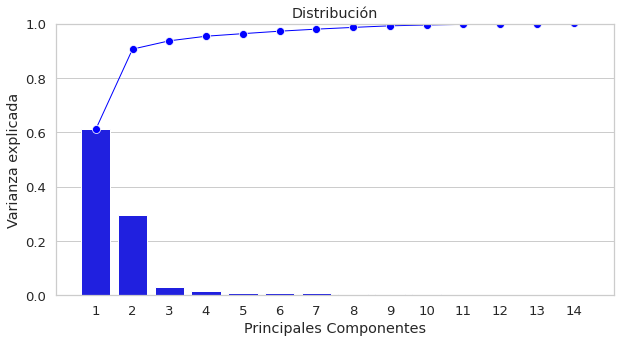

In [128]:
ComponentesPC = np.arange(DFVar.n_components_) + 1

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 5))

_ = sns.barplot(x = ComponentesPC, 
                y = DFVar.explained_variance_ratio_, 
                color = 'blue'
                )

_ = sns.lineplot(x = ComponentesPC-1, 
                 y = np.cumsum(DFVar.explained_variance_ratio_), 
                 color = 'blue', 
                 linestyle = '-', 
                 linewidth = 1, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Distribución')
plt.xlabel('Principales Componentes')
plt.ylabel('Varianza explicada')
plt.ylim(0, 1)
plt.show()

In [129]:
((DFVarSummary.iloc[2][2])*100).round(0)

94.0

In [130]:
((DFVarSummary.iloc[2][1])*100).round(2)

90.57

In [131]:
DFVarSummary.columns = ['PC{}'.format(i) for i in range(1, len(DFVarSummary.columns) + 1)]
DFVarSummary.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,166585.0753,115824.7017,37256.8166,27747.1030,20698.6823,20278.0072,18520.7019,17040.2350,16294.1101,11615.2249,10413.1020,8786.7540,8197.6489,9.1139
Proportion of variance,0.6106,0.2952,0.0305,0.0169,0.0094,0.0090,0.0075,0.0064,0.0058,0.0030,0.0024,0.0017,0.0015,0.0000
Cumulative proportion,0.6106,0.9057,0.9363,0.9532,0.9626,0.9717,0.9792,0.9856,0.9915,0.9944,0.9968,0.9985,1.0000,1.0000


In [132]:
DFVar.components_

array([[ 4.91051249e-01,  5.56462827e-06,  3.88614777e-01,
         3.81500219e-01,  3.72316835e-01,  3.46509376e-01,
         3.23011793e-01,  3.08673561e-01,  2.65507164e-02,
         3.12770650e-02,  2.68070179e-02,  2.21621169e-02,
         2.21853695e-02,  2.48009681e-02],
       [ 8.69327754e-01,  8.29040076e-06, -2.21093578e-01,
        -2.26152724e-01, -2.16301840e-01, -1.93842429e-01,
        -1.76598449e-01, -1.67159508e-01,  5.71363887e-03,
         1.08089432e-02,  1.09872540e-02,  1.03870690e-02,
         1.16983563e-02,  1.53688818e-02],
       [-2.05568406e-02, -4.10147427e-06, -5.48883056e-01,
        -3.90963429e-01, -4.81292082e-02,  2.61019218e-01,
         4.28087752e-01,  4.83714530e-01,  3.74864969e-02,
         1.60057940e-01,  1.35142204e-01,  9.44275935e-02,
         5.58917508e-02, -2.09386269e-02],
       [-1.84118341e-02, -2.41286925e-07, -2.04861603e-01,
        -3.77746536e-02,  5.53447008e-01,  7.90910967e-02,
        -2.00097645e-01, -3.08367938e-01,  1.

In [134]:
pcsComponents_df = pd.DataFrame(DFVar.components_.transpose(), 
                                columns = DFVarSummary.columns,
                                index = ConteoNum.iloc[:, 0:].columns
                                )
pcsComponents_df.iloc[:,:14]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Monto,0.491051,0.869328,-0.020557,-1.841183e-02,-0.044128,0.016899,-0.001114,0.001028,0.009472,3.750818e-03,0.005828,0.000018,0.001869,-1.036322e-05
Edad,0.000006,0.000008,-0.000004,-2.412869e-07,-0.000005,0.000002,-0.000001,-0.000002,0.000007,-2.084484e-07,0.000005,-0.000009,-0.000002,1.000000e+00
ECSEP,0.388615,-0.221094,-0.548883,-2.048616e-01,0.316883,0.002628,-0.456336,0.007253,0.070332,1.726640e-01,-0.267354,-0.204612,-0.005862,-2.626138e-06
ECAGO,0.381500,-0.226153,-0.390963,-3.777465e-02,0.011474,-0.080547,0.526906,-0.066039,0.099272,7.921287e-03,0.351050,0.476459,0.015960,7.238483e-07
ECJUL,0.372317,-0.216302,-0.048129,5.534470e-01,-0.247591,0.295830,0.028716,0.081260,-0.108043,-3.365400e-01,0.151470,-0.441650,-0.082454,-6.009492e-06
ECJUN,0.346509,-0.193842,0.261019,7.909110e-02,-0.367888,-0.473240,-0.178228,-0.227742,-0.097404,-1.369191e-01,-0.374919,0.233508,0.318929,4.213201e-06
ECMAY,0.323012,-0.176598,0.428088,-2.000976e-01,-0.015793,-0.078343,-0.013436,0.480093,0.126480,1.009797e-01,-0.052465,0.092393,-0.605506,1.563479e-06
ECABR,0.308674,-0.167160,0.483715,-3.083679e-01,0.226878,0.391800,0.076828,-0.262898,-0.105467,2.368137e-01,0.203118,-0.158543,0.366214,6.051477e-07
MTOSEP,0.026551,0.005714,0.037486,1.934771e-01,0.202460,-0.228048,0.611722,-0.082590,0.170884,2.791503e-01,-0.470900,-0.396527,-0.017225,-1.491517e-07
MTOAGO,0.031277,0.010809,0.160058,6.733127e-01,0.337296,0.107598,-0.254751,-0.004666,0.226391,3.580915e-01,0.023462,0.383966,0.046985,3.551963e-06


In [135]:
#Realizamos el preprocesamiento 
pcsComponents_dfX = pd.DataFrame(DFVar.components_.transpose(), 
                                columns = DFVarSummary.columns,
                                index = ConteoNum.iloc[:, 0:].columns
                                )
pcsComponents_dfX

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Monto,0.491051,0.869328,-0.020557,-1.841183e-02,-0.044128,0.016899,-0.001114,0.001028,0.009472,3.750818e-03,0.005828,0.000018,0.001869,-1.036322e-05
Edad,0.000006,0.000008,-0.000004,-2.412869e-07,-0.000005,0.000002,-0.000001,-0.000002,0.000007,-2.084484e-07,0.000005,-0.000009,-0.000002,1.000000e+00
ECSEP,0.388615,-0.221094,-0.548883,-2.048616e-01,0.316883,0.002628,-0.456336,0.007253,0.070332,1.726640e-01,-0.267354,-0.204612,-0.005862,-2.626138e-06
ECAGO,0.381500,-0.226153,-0.390963,-3.777465e-02,0.011474,-0.080547,0.526906,-0.066039,0.099272,7.921287e-03,0.351050,0.476459,0.015960,7.238483e-07
ECJUL,0.372317,-0.216302,-0.048129,5.534470e-01,-0.247591,0.295830,0.028716,0.081260,-0.108043,-3.365400e-01,0.151470,-0.441650,-0.082454,-6.009492e-06
ECJUN,0.346509,-0.193842,0.261019,7.909110e-02,-0.367888,-0.473240,-0.178228,-0.227742,-0.097404,-1.369191e-01,-0.374919,0.233508,0.318929,4.213201e-06
ECMAY,0.323012,-0.176598,0.428088,-2.000976e-01,-0.015793,-0.078343,-0.013436,0.480093,0.126480,1.009797e-01,-0.052465,0.092393,-0.605506,1.563479e-06
ECABR,0.308674,-0.167160,0.483715,-3.083679e-01,0.226878,0.391800,0.076828,-0.262898,-0.105467,2.368137e-01,0.203118,-0.158543,0.366214,6.051477e-07
MTOSEP,0.026551,0.005714,0.037486,1.934771e-01,0.202460,-0.228048,0.611722,-0.082590,0.170884,2.791503e-01,-0.470900,-0.396527,-0.017225,-1.491517e-07
MTOAGO,0.031277,0.010809,0.160058,6.733127e-01,0.337296,0.107598,-0.254751,-0.004666,0.226391,3.580915e-01,0.023462,0.383966,0.046985,3.551963e-06


In [136]:
DFVarSummary.iloc[:, 0:].head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,166585.075260,115824.701657,37256.816552,27747.103018,20698.682256,20278.007203,18520.701884,17040.234998,16294.110103,11615.224907,10413.102035,8786.753999,8197.648912,9.113919e+00
Proportion of variance,0.610571,0.295166,0.030540,0.016939,0.009426,0.009047,0.007547,0.006389,0.005842,0.002968,0.002386,0.001699,0.001479,1.827572e-09
Cumulative proportion,0.610571,0.905738,0.936278,0.953218,0.962644,0.971691,0.979238,0.985627,0.991469,0.994437,0.996823,0.998521,1.000000,1.000000e+00


In [139]:
pcs = PCA()
pcs.fit(preprocessing.scale(DFVarSummary.iloc[:, 0:].dropna(axis=0)))

PCA()

In [140]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3
Standard deviation,4.5811,0.1180,0.0
Proportion of variance,0.9993,0.0007,0.0
Cumulative proportion,0.9993,1.0000,1.0


In [141]:
pcsSummary_df.iloc[0,2]

6.213533547945123e-16

In [142]:
#Descomposición 
pcs = PCA()

In [143]:
pcs_t = pcs.fit_transform(scaled_df)
pcs_t[:14]

array([[-1.95861347e+00, -5.36935548e-01,  1.33026326e+00,
        -1.76466173e-01,  1.78476835e-02,  2.77646145e-03,
         1.29010046e-02,  5.80885205e-02,  2.21268695e-01,
         2.02066015e-02,  1.68710287e-02, -3.14858410e-03,
         8.15558569e-03,  9.86538923e-03],
       [-1.73543639e+00, -2.17455383e-01,  8.63894947e-01,
        -2.80889399e-01,  4.94098943e-02, -1.18062416e-01,
         9.91641641e-02,  7.52386637e-02, -2.87026648e-01,
        -7.30485666e-02, -5.57769745e-03,  1.22574823e-02,
        -4.04768371e-03,  7.41830384e-04],
       [-1.22457257e+00, -2.85108665e-01,  2.13127766e-01,
        -7.66632559e-03,  1.26938297e-01, -6.20521778e-02,
        -1.40071875e-02,  8.40632249e-02,  2.82844658e-01,
        -1.60703686e-02,  1.12401687e-01, -8.04550604e-02,
        -4.13466939e-02, -5.71189238e-02],
       [-5.41595290e-01, -6.66646687e-01,  9.76280692e-02,
         2.92571245e-01,  8.85437669e-03,  1.09430096e-01,
        -1.34229136e-01,  6.32182383e-02,  5.

In [144]:
#El % de la varianza explicada por cada componente
#El acumulado de la varianza explicada por cada componente

pcsSummary_df = pd.DataFrame({
                              '% varianza explicada': np.round(pcs.
                                                               explained_variance_ratio_,4) * 100,
                              '% varianza acumulada': np.cumsum(pcs.
                                                                explained_variance_ratio_) * 100})
pcsSummary_df

,% varianza explicada,% varianza acumulada
0,42.28,42.277891
1,12.26,54.533132
2,7.46,61.997411
3,6.61,68.605797
4,6.31,74.918180
5,6.23,81.152296
6,5.57,86.721112
7,5.19,91.911302
8,5.05,96.963631
9,1.89,98.852509


In [145]:
#Agregamos etiquetas 

pcs_labels = [f'PC{i + 1}' for i in range(len(scaled_df.columns))]
pcsSummary_df.index = pcs_labels
pcsSummary_df

,% varianza explicada,% varianza acumulada
PC1,42.28,42.277891
PC2,12.26,54.533132
PC3,7.46,61.997411
PC4,6.61,68.605797
PC5,6.31,74.918180
PC6,6.23,81.152296
PC7,5.57,86.721112
PC8,5.19,91.911302
PC9,5.05,96.963631
PC10,1.89,98.852509


In [146]:
#Agregamos valores de cada componente
pcs_df = pd.DataFrame(pcs_t, columns =pcs_labels)

print("Varianza total variables originales: ", scaled_df.var().sum())
print("Varianza total de los componentes: ", pcs_df.var().sum())

Varianza total variables originales:  14.000467336515669
Varianza total de los componentes:  14.000467336515666


In [147]:
total_var =scaled_df.var().sum()

pd.DataFrame({
  "Porcentaje Varianza": (scaled_df.var()/ total_var) * 100,
  "Porcentaje Varianza Acumulado": (scaled_df.var().cumsum() / total_var) *100
})

,Porcentaje Varianza,Porcentaje Varianza Acumulado
Monto,7.142857,7.142857
Edad,7.142857,14.285714
ECSEP,7.142857,21.428571
ECAGO,7.142857,28.571429
ECJUL,7.142857,35.714286
ECJUN,7.142857,42.857143
ECMAY,7.142857,50.000000
ECABR,7.142857,57.142857
MTOSEP,7.142857,64.285714
MTOAGO,7.142857,71.428571


Composición de cada componente arrojado por PCA

In [148]:
comps_df = pd.DataFrame(
  pcs.components_.round(4), #peso de cada componente
  columns = pcs_df.columns,
  index = scaled_df.columns) 
comps_df.iloc[:,:14]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Monto,0.1655,0.0328,0.3724,0.3833,0.3883,0.3916,0.3885,0.3807,0.1351,0.1168,0.1281,0.1169,0.1137,0.1055
Edad,0.3007,0.0719,-0.1908,-0.1746,-0.1269,-0.1204,-0.1059,-0.0942,0.3832,0.4084,0.3923,0.3496,0.3039,0.3235
ECSEP,-0.3786,-0.8695,-0.0342,-0.0018,0.0347,0.0341,0.0339,0.0185,0.1738,0.2009,0.1221,0.0623,-0.0609,-0.0509
ECAGO,-0.2001,0.3390,-0.0639,0.0076,0.0605,0.0748,0.0396,-0.0706,0.3621,0.3457,0.2447,-0.0947,-0.6098,-0.3657
ECJUL,0.0353,-0.0398,0.0414,0.0832,0.1138,0.0284,-0.1068,-0.1650,0.2257,0.1487,-0.2396,-0.5778,-0.1934,0.6592
ECJUN,-0.0789,0.0715,-0.0440,-0.0288,0.0992,0.0145,-0.0993,0.0693,0.0406,0.4084,-0.1082,-0.5008,0.6024,-0.4092
ECMAY,0.1112,-0.0788,0.0082,-0.0324,-0.1212,0.1265,-0.0076,0.0079,-0.2016,-0.2788,0.7852,-0.4622,0.0143,0.0255
ECABR,-0.0464,0.0274,0.0093,-0.1356,0.0931,0.0392,0.0498,-0.0003,-0.7487,0.5785,0.0682,0.0778,-0.1649,0.1813
MTOSEP,-0.8220,0.3303,0.0103,0.0169,-0.0186,0.0191,0.0237,0.0587,0.0199,-0.1107,0.1530,0.0988,0.2529,0.3167
MTOAGO,-0.0292,-0.0090,0.5667,0.3869,0.1229,-0.2053,-0.4200,-0.4889,-0.0566,0.0509,0.1449,0.1241,0.0600,-0.0992


In [149]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,2.4329,1.3099,1.0223,0.9619,0.9401,0.9342,0.8830,0.8524,0.8410,0.5142,0.2665,0.2026,0.1592,0.1525
Proportion of variance,0.4228,0.1226,0.0746,0.0661,0.0631,0.0623,0.0557,0.0519,0.0505,0.0189,0.0051,0.0029,0.0018,0.0017
Cumulative proportion,0.4228,0.5453,0.6200,0.6861,0.7492,0.8115,0.8672,0.9191,0.9696,0.9885,0.9936,0.9965,0.9983,1.0000


In [150]:
comps_df.iloc[:,:7].abs().idxmax()

PC1    MTOSEP
PC2     ECSEP
PC3    MTOAGO
PC4    MTOABR
PC5    MTOABR
PC6    MTOJUL
PC7    MTOMAY
dtype: object

In [151]:
comps_df.iloc[:,:14].abs().idxmax()

PC1     MTOSEP
PC2      ECSEP
PC3     MTOAGO
PC4     MTOABR
PC5     MTOABR
PC6     MTOJUL
PC7     MTOMAY
PC8     MTOJUL
PC9      ECABR
PC10     ECABR
PC11     ECMAY
PC12     ECJUL
PC13     ECAGO
PC14     ECJUL
dtype: object

In [152]:
comps_df.abs().idxmax()

PC1     MTOSEP
PC2      ECSEP
PC3     MTOAGO
PC4     MTOABR
PC5     MTOABR
PC6     MTOJUL
PC7     MTOMAY
PC8     MTOJUL
PC9      ECABR
PC10     ECABR
PC11     ECMAY
PC12     ECJUL
PC13     ECAGO
PC14     ECJUL
dtype: object

In [153]:
comps_df.PC1.abs().nlargest(5)

MTOSEP    0.8220
ECSEP     0.3786
Edad      0.3007
ECAGO     0.2001
Monto     0.1655
Name: PC1, dtype: float64

In [154]:
comps_df.PC1.idxmax()

'Edad'

In [155]:
comps_df.PC2.idxmin()

'ECSEP'

In [156]:
comps_df.PC2.abs().nsmallest(5)

MTOJUL    0.0001
MTOMAY    0.0001
MTOABR    0.0011
MTOJUN    0.0014
MTOAGO    0.0090
Name: PC2, dtype: float64

#9. Visualización de los datos 





##HeatMap

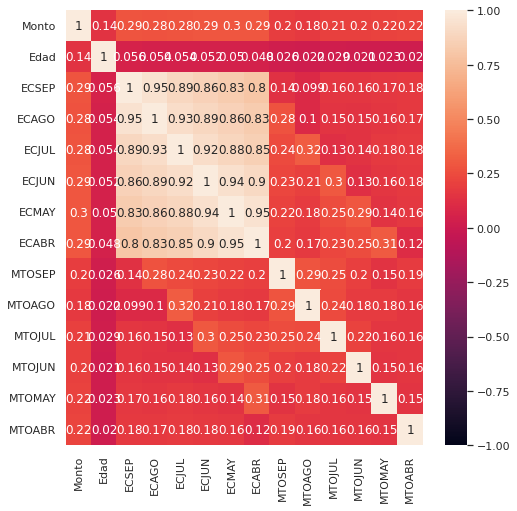

In [161]:
#Visualizamos la correlación entre variables
correlacion = ConteoNum.corr()
sns.set(rc = {'figure.figsize':(8, 8)})
sns.heatmap(correlacion, vmin = -1, vmax = 1, annot= True)

##Dispersión

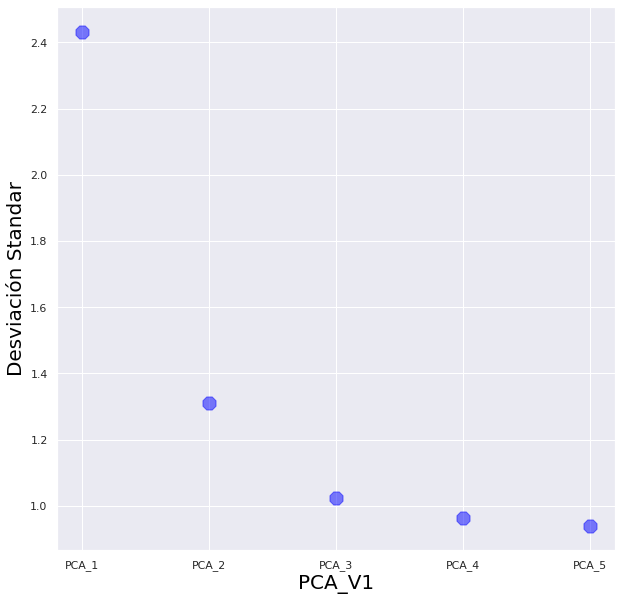

In [166]:
data = {'PCA_V1': ['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5'], 
'Standard deviation': [2.4329,	1.3099,	1.0223,	0.9619,	0.9401]}

data = pd.DataFrame(data)

fig = plt.figure(figsize=(10, 10))
plt.scatter(datos['PCA_V1'], data['Standard deviation'],
            marker = '8', s= 200, color = "blue", alpha = 0.5)

plt.xlabel ('PCA_V1', fontsize = 20, color = 'black')
plt.ylabel ('Desviación Standar', fontsize = 20, color = 'black')
plt.show()

##Histograma

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b472e3e90>,
      dtype=object)

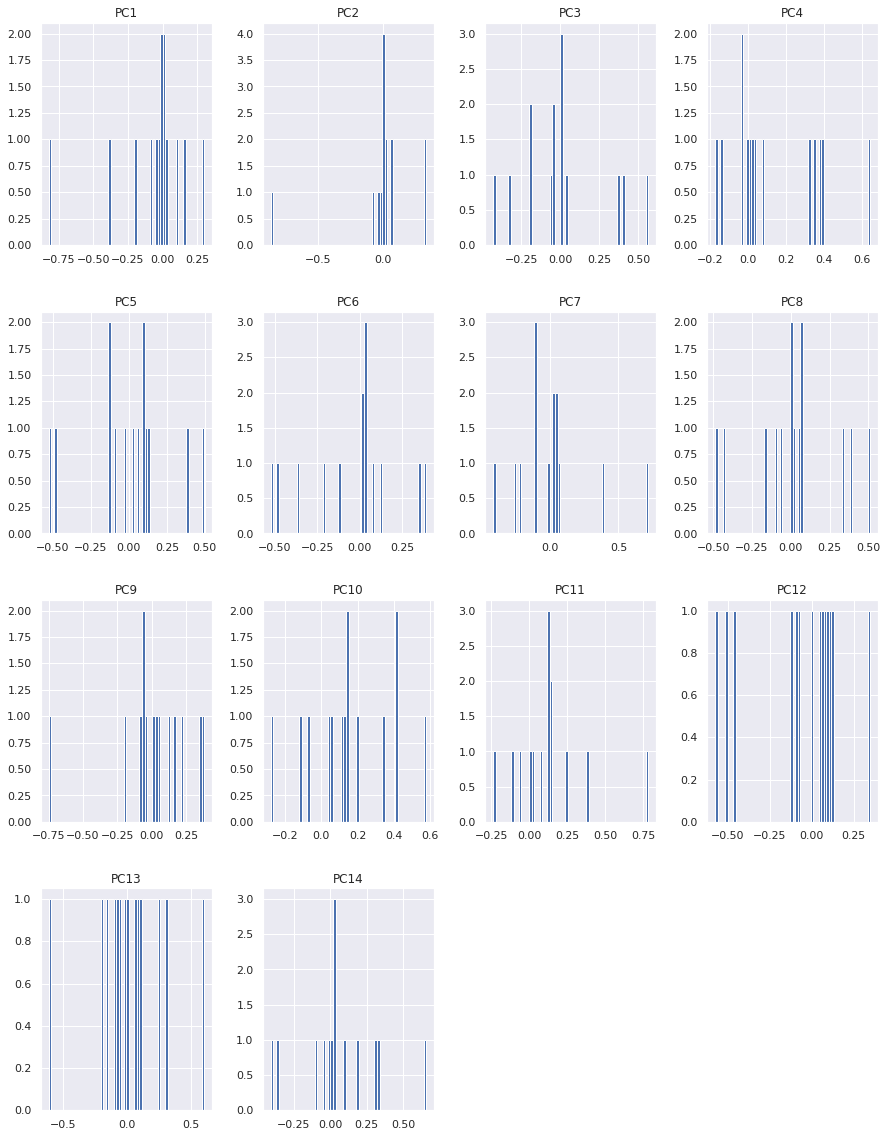

In [163]:
comps_df.hist(bins = 60, figsize=(15,20))